# Numerical Integration 1

* Integrate functions in 1D
* General problem. Find $I$:

$$I = \int_{x_1}^{x_2}f(x)dx.$$

* ODE solvers do this:

$$\frac{dy}{dx} = f(x) \rightarrow y_2 - y_1 = \int_{x_1}^{x_2}f(x)dx.$$

* Numerical integration methods have some similiarities to ODE solvers.


## Outline
* Direct fit polynomial
* Trapazoid rule
* Simpson's rule

### Direct fit polynomial
* This is useful when we have an unknown function, but whose values we know at specific given points.
* Fit a polynomial to the function, then integrate the polynomial between the desired bounds.
    * The fitting part is tricky.
    * The integrating part is easy (analytic).
    * Be wary of high order polynomials. 
        * If you fit a high order polynomial to a large number of points, the polynomial will likely vary widely between the given points, and diverge quickly before and after the first and last points.

In [1]:
using Plots
using CurveFit
using Polynomials
using Interpolations
using LaTeXStrings

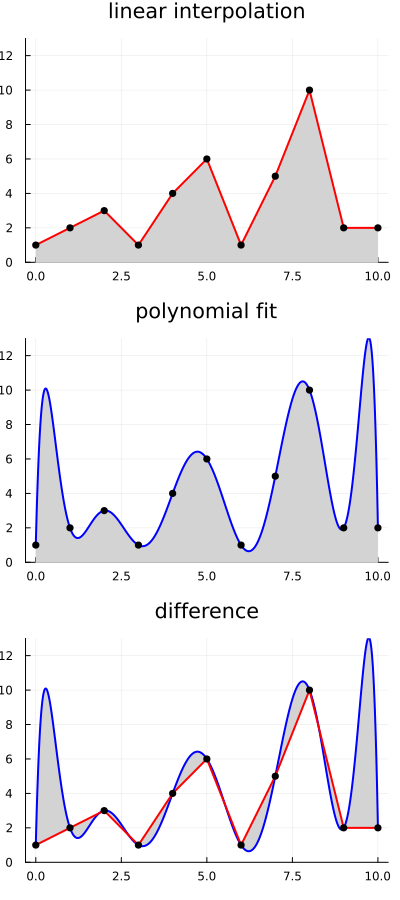

In [2]:
xgiven = collect(0:10)
ygiven = [1,2,3,1,4,6,1,5,10,2,2]

x = LinRange(0,10,1000)

p = poly_fit(xgiven,ygiven,length(xgiven)-1)
fp = Polynomial(p)
ypoly = fp.(x)

f = LinearInterpolation(xgiven, ygiven)
yinterp = f.(x)

plot(x, zeros(length(x)), fillrange=yinterp, color="lightgray")
plot!(x,yinterp, color="red", lw=2)
scatter!(xgiven,ygiven, color="black")
plot!(legend=nothing)
plot!(ylim=[0,13])
p1=plot!(title="linear interpolation")

plot(x, zeros(length(x)), fillrange=ypoly, color="lightgray")
plot!(x,ypoly, color="blue", lw=2)
scatter!(xgiven,ygiven, color="black")
plot!(legend=nothing)
plot!(ylim=[0,13])
p2=plot!(title="polynomial fit")

plot(x, min(yinterp, ypoly), fillrange=max(yinterp, ypoly), color="lightgray")
plot!(x,ypoly, color="blue", lw=2)
plot!(x,yinterp, color="red", lw=2)
scatter!(xgiven,ygiven, color="black")
plot!(legend=nothing)
plot!(ylim=[0,13])
p3=plot!(title="difference")

plot(p1, p2, p3, layout=(3,1), size=(400,900))

### Trapazoid Rule
* Use a uniform grid of spacing $\Delta x$.
* Approximate the function as linear on each interval.

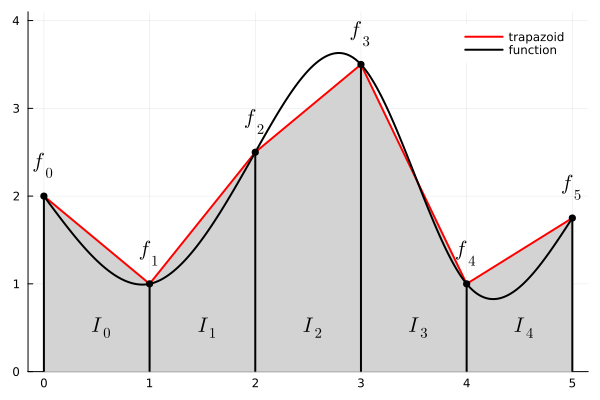

In [3]:
x    = 0:5
fpts = [2, 1, 2.5, 3.5, 1, 1.75]
Fi = LinearInterpolation(x, fpts)
Fs = CubicSplineInterpolation(x, fpts)
xx = LinRange(0,5,1000)
fi = Fi(xx)
fs = Fs(xx)

plot(xx, zeros(length(xx)), fillrange=fi, color="lightgray", label=nothing)
plot!(xx,fi, color="red",   lw=2, label="trapazoid")
plot!(xx,fs, color="black", lw=2, label="function")
plot!(x,fpts, line=:stem, marker=:circle, lw=2, color="black", label=nothing)
plot!(legend_foreground_color=nothing)
plot!(ylim=[0,4.1])

annotate!(x[1]+0.55,0.5, L"I_0")
annotate!(x[2]+0.55,0.5, L"I_1")
annotate!(x[3]+0.55,0.5, L"I_2")
annotate!(x[4]+0.55,0.5, L"I_3")
annotate!(x[5]+0.55,0.5, L"I_4")

annotate!(x[1],fpts[1]+0.35, L"f_0")
annotate!(x[2],fpts[2]+0.35, L"f_1")
annotate!(x[3],fpts[3]+0.35, L"f_2")
annotate!(x[4],fpts[4]+0.35, L"f_3")
annotate!(x[5],fpts[5]+0.35, L"f_4")
annotate!(x[6],fpts[6]+0.35, L"f_5")

* Now we have

$$I = I_0 + I_1 + I_2 + I_3 + I_4.$$

\begin{align}
I_0 &= \frac{\Delta x}{2}(f_0+f_1), \\
I_1 &= \frac{\Delta x}{2}(\phantom{f_0+}f_1+f_2), \\
I_2 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+}f_2+f_3), \\
I_3 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+f_2+}f_3+f_4), \\
I_4 &= \frac{\Delta x}{2}(\phantom{f_0+f_1+f_2+f_3+}f_4+f_5). \\
\end{align}

<font color=blue>
$$I = -\frac{\Delta x}{2}(f_0+f_{n-1}) + \Delta x\sum_{i=0}^{n-1}f_i.$$
</font>




* Note the overlap of the terms.
    * There are two of every function value except the first and the last.
    * So, we double all of them and then subtract the first and last.
* This method can be used for nonuniform grids (but then we can't simply factor out the $\Delta x$.
* The method is 2$^{nd}$ order. That is, the global error is $\propto \Delta x^2$. 




#### Midpoint method
* Another second order method is the midpoint method. 
* The trapazoid method effectively takes the sum of the areas of intervals, where each interval area is the width times the function evaluated as the average of its values at the endpoints of the intervals.
* The midpoint method takes the sum of the areas of intervals, where each interval area is the width times the function evaluated at the midpoint of the interval.

### Simpson's Rule
* Instead of fitting a line between adjacent points, as in the Trapazoid Rule, we fit a parabola through 3 adjacent points.

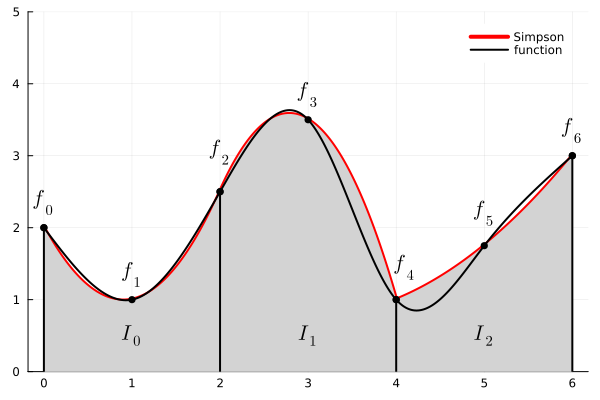

In [4]:
n    = 7
x    = 0:n-1
fpts = [2, 1, 2.5, 3.5, 1, 1.75, 3]
dx   = x[2]-x[1]
Fs = CubicSplineInterpolation(x, fpts)
xx = LinRange(0,n-1,1000)
fs = Fs(xx)

nI = Integer((n-1)/2)
p = plot()

for i in 1:nI
    a  = 1/2/dx^2*(fpts[1+2*(i-1)] -2*fpts[2+2*(i-1)] +     fpts[3+2*(i-1)])
    b  = 1/dx*(-1.5*fpts[1+2*(i-1)] +2*fpts[2+2*(i-1)] - 0.5*fpts[3+2*(i-1)])
    c  = fpts[1+2*(i-1)]
    xi = LinRange(0+2*(i-1),2+2*(i-1),1000)
    fi = a*(xi.-xi[1]).^2 .+ b*(xi.-xi[1]) .+ c
    plot!(xi,fi, color="red", lw=4, label= i==1 ? "Simpson" : nothing)
    plot!(xi,zeros(length(xi)), fillrange=fi, color="lightgray", label=nothing)
end

plot!(xx,fs, color="black", lw=2, label="function")
scatter!(x,fpts, marker=:circle, lw=2, color="black", label=nothing)
plot!(x[1:2:end],fpts[1:2:end], line=:stem, marker=:circle, lw=2, color="black", label=nothing)
plot!(legend_foreground_color=nothing)
plot!(ylim=[0,5])

annotate!(x[1]+1,0.5, L"I_0")
annotate!(x[1]+3,0.5, L"I_1")
annotate!(x[1]+5,0.5, L"I_2")

annotate!(x[1],fpts[1]+0.35, L"f_0")
annotate!(x[2],fpts[2]+0.35, L"f_1")
annotate!(x[3],fpts[3]+0.55, L"f_2")
annotate!(x[4],fpts[4]+0.35, L"f_3")
annotate!(x[5]+0.1,fpts[5]+0.45, L"f_4")
annotate!(x[6],fpts[6]+0.45, L"f_5")
annotate!(x[7],fpts[7]+0.35, L"f_6")

display(p)

* Consider each segment individually. 
* Then $x_0=0$, $x_1=\Delta x$, and $x_2 = 2\Delta x$.
* Parabola:

$$f(x) = ax^2 + bx + c.$$

* Set $f(0)=f_0$, $f(\Delta x)=f_1$, $f(2\Delta x)=f_2$. This gives three equations for each of our unknowns $a$, $b$, and $c$:

\begin{align}
f_0 &= c, \\
f_1 &= a\Delta x^2 + b\Delta x + c, \\
f_2 &= 4a\Delta x^2 + 2b\Delta x + c. 
\end{align}

* Solving these yeilds:

\begin{align}
a &= \frac{1}{2\Delta x^2}(f_0 - 2f_1 + f_2), \\
b &= \frac{1}{\Delta x}\left(-\frac{3}{2}f_0 +2f_1 - \frac{1}{2}f_2\right), \\
c &= f_0. \end{align}




* Now, the integral over the first interval is:

\begin{align}
I_0 &= \int_0^{2\Delta x}f(x)dx = \left.\frac{ax^3}{3}+\frac{bx^2}{2}+cx\right|_0^{2\Delta x} \\
&= \frac{8a\Delta x^3}{3} + \frac{4b\Delta x^2}{2} + 2c\Delta x.
\end{align}

* Finally, insert $a$, $b$, and $c$ into $I_0$, and simplify:

$$I_0 = \frac{\Delta x}{3}(f_0 + 4f_1 + f_2).$$




* Now, we can repeat this process for the other segments and then add all intervals:

$$I = I_0 + I_1 + I_2.$$

$$I = \frac{\Delta x}{3}\left[\underbrace{f_0 + 4f_1 + f_2}_{\text{segment 1}} + \underbrace{f_2 + 4f_3 + f_4}_{\text{segment 2}} + \underbrace{f_4 + 4f_5 + f_6}_{\text{segment 3}}\right].$$

* Note, between segments we can combine the recurring terms: $f_2+f_2\rightarrow 2f_2$, and $f_4 + f_4\rightarrow 2f_4$.
* The coefficients of $f$ are either 1, 4, or 2.

$$I = \frac{\Delta x}{3}\left[f_0 + 4f_1 + 2f_2 + 4f_3 + 2f_4 + 4f_5 + f_6\right].$$




* Group terms:

<font color=blue>
$$I = \frac{4\Delta x}{3}\sum_{i\,\text{odd}}f_i +
      \frac{2\Delta x}{3}\sum_{i\,\text{even}}f_i - 
      \frac{\Delta x}{3}(f_0 + f_{n-1}).$$
</font>

* Here, we have done $\pm\frac{\Delta x}{3}f_0$ and $\pm\frac{\Delta x}{3}f_{n-1}$ to get 2 as the coefficient of $f_0$ and $f_{n-1}$ so that the even sum can go over all even points; this then results in the final correction term. 

* **Simpson's rule requires an odd number of points: $n$ is odd.**
* The global integration error is $\propto\Delta x^3\rightarrow \mathcal{O}(\Delta x^3)$.

#### Question: what if we have an even number of points?


* Could do Simpson's rule for $n-1$ points and Trapazoid rule for the last interval.
    * But that is lower order.
* Could do Simpson's rule for $n-1$ points, then integrate a parabola through the last three points over the last sub interval.
* Could use **Simpson's 3/8 rule**.
    * That's a 4 point method with the same order. So apply that to the first 4 points, then the usual Simpson's rule to the rest of the intervals.
    
    $$\int_{x_0}^{x_3}f(x)dx = \frac{3}{8}\Delta x(f_0 + 3f_1 + 3f_2 + f_3).$$

#### Question: what if you don't have, or can't evaluate the function at the beginning or end of the interval?



* For example, if the function goes to $-\infty$ as $x\rightarrow x_0$.
* Can extrapolate the function.
* Assume a linear relation in the region $[x_0,\,x_1]$ using the function between $[x_1,\,x_2]$.
    
\begin{align}
&f(x)= ax+b, \\
&f_1 = a\Delta x + b, \\
&f_2 = 2a\Delta x + b, \\
\end{align}

Hence, 

\begin{align}
a&=\frac{f_2-f_1}{\Delta x}, \\
b&= 2f_1 - f_2
\end{align}

$$I_0 = \int_{x_0}^{x_1}f(x)dx = \frac{a\Delta x^2}{2} + b\Delta x,$$

Insert $a$ and $b$ to get:

$$I_0 = \Delta x\left(\frac{3}{2}f_1 - \frac{1}{2}f_2\right).$$

* For a parabola, computed as for Simpson's, we would get

$$I_0 = \Delta x\left(\frac{23}{12}f_1 - \frac{16}{12}f_2 + \frac{5}{12}f_3\right).$$

    